In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [38]:
train = pd.read_csv('titanic_train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


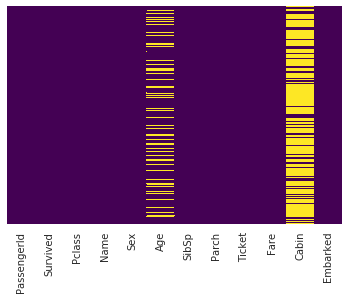

In [39]:
sns.heatmap(train.isnull(),yticklabels=False, cbar=False, cmap='viridis')

In [40]:
sns.set_style('whitegrid')

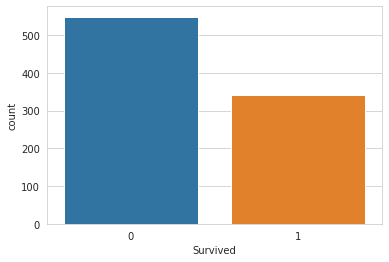

In [41]:
sns.countplot(x='Survived',data=train)

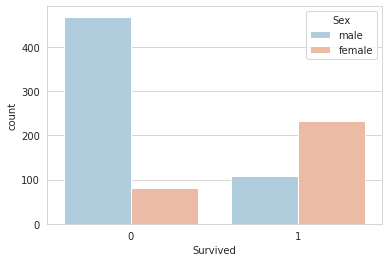

In [42]:
sns.countplot(x='Survived', hue='Sex',data=train, palette='RdBu_r')

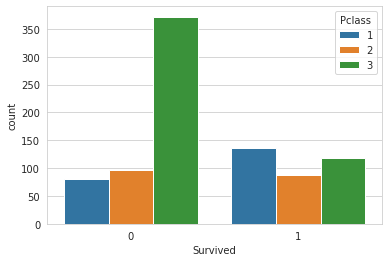

In [43]:
sns.countplot(x='Survived', hue='Pclass',data=train)

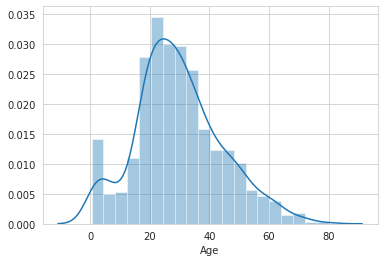

In [44]:
sns.distplot(train['Age'].dropna())

In [45]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


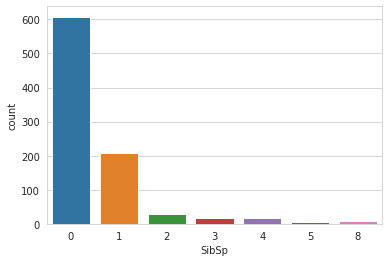

In [46]:
sns.countplot(x='SibSp', data=train)

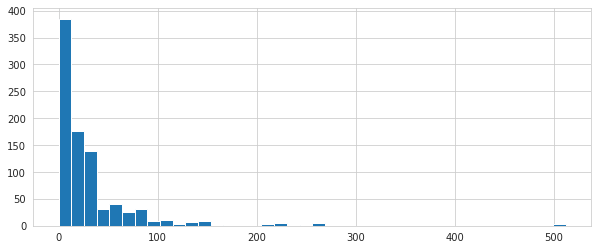

In [47]:
train['Fare'].hist(bins=40,figsize=(10,4))

In [48]:
import cufflinks as cf

In [49]:
cf.go_offline()

In [50]:
train['Fare'].iplot(kind='hist',bins=50)

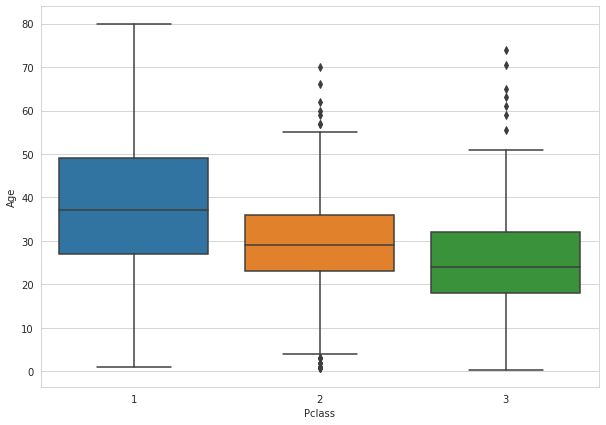

In [51]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass', y='Age',data=train)

In [52]:
def impute_age(cols):
    Age = cols[0]
    PClass = cols[1]
    
    if pd.isnull(Age):
        if PClass == 1:
            return 37
        elif PClass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [53]:
train['Age'] = train[['Age','Pclass']].apply(impute_age, axis=1)

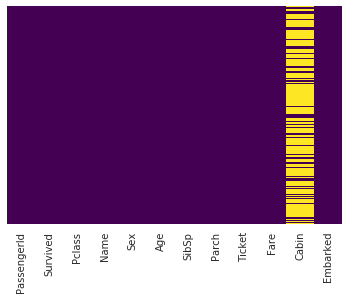

In [54]:
sns.heatmap(train.isnull(),yticklabels=False, cbar=False, cmap='viridis')

In [55]:
train.drop('Cabin',axis=1,inplace=True)
train.dropna(inplace=True)

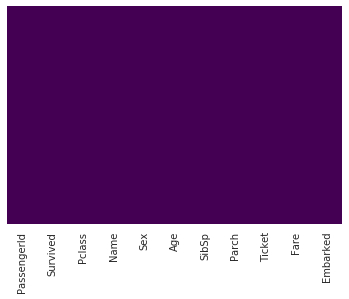

In [56]:
sns.heatmap(train.isnull(),yticklabels=False, cbar=False, cmap='viridis')

In [59]:
sex = pd.get_dummies(train['Sex'], drop_first=True)

In [60]:
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [64]:
embark = pd.get_dummies(train['Embarked'], drop_first=True)

In [65]:
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [66]:
train = pd.concat([train,sex,embark],axis=1)

In [67]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [68]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [70]:
train.drop(['PassengerId'],axis=1,inplace=True)

In [71]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [72]:
X = train.drop('Survived',axis=1)
y = train['Survived']

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30)

In [76]:
from sklearn.linear_model import LogisticRegression

In [83]:
lm = LogisticRegression(solver='liblinear')

In [84]:
lm.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [85]:
pred = lm.predict(X_test)

In [86]:
from sklearn.metrics import classification_report

In [88]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.78      0.88      0.83       156
           1       0.79      0.65      0.71       111

    accuracy                           0.78       267
   macro avg       0.78      0.76      0.77       267
weighted avg       0.78      0.78      0.78       267



In [89]:
from sklearn.metrics import confusion_matrix

In [90]:
confusion_matrix(y_test,pred)

array([[137,  19],
       [ 39,  72]])